In [9]:
from face_detector_image_generator import face_detection_and_capture
from Canny import Canny

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import math

## **Deteksi Titik Kunci pada Wajah Menggunakan Jaringan Saraf Tiruan**
---

Setelah kita belajar mendeteksi wajah menggunakan metode Viola-Jones, langkah berikutnya adalah mendeteksi titik-titik kunci pada wajah menggunakan jaringan saraf tiruan (neural network). Titik-titik kunci ini bisa mencakup posisi mata, hidung, mulut, dan sebagainya.

#### Apa Itu Deteksi Titik Kunci Wajah?

**Deteksi titik kunci wajah** adalah proses menemukan titik-titik spesifik pada wajah, seperti ujung mata, sudut bibir, atau ujung hidung. Ini lebih rumit dibandingkan deteksi objek biasa karena kita harus menemukan banyak titik pada berbagai posisi dan orientasi di wajah, bukan hanya empat sudut dari kotak pembatas.

#### Langkah-langkah dalam Deteksi Titik Kunci

1. **Deteksi Wajah**: Pertama-tama, kita harus mendeteksi wajah dalam gambar, biasanya dengan menempatkannya dalam sebuah kotak pembatas (bounding box).
  
2. **Deteksi Titik Kunci**: Setelah wajah ditemukan, kita menggunakan jaringan saraf tiruan untuk mendeteksi titik-titik kunci pada wajah tersebut. Ini berarti kita harus menemukan lebih dari 10 titik berbeda yang merepresentasikan bagian-bagian penting dari wajah.

#### Menggunakan Data untuk Pelatihan

Untuk melatih jaringan saraf tiruan agar bisa mendeteksi titik kunci dengan baik, kita memerlukan banyak data. Salah satu sumber data yang bagus adalah dari Kaggle, di mana terdapat banyak gambar wajah beserta titik-titik kuncinya. Misalnya, tantangan deteksi titik kunci wajah di Kaggle menyediakan file CSV yang berisi link ke 7.049 gambar (berukuran 96 x 96 piksel), masing-masing dengan 15 titik kunci.

#### Proses Pelatihan

Untuk melatih model deteksi titik kunci:
1. **Kumpulkan Data**: Kumpulkan gambar wajah dan tandai titik-titik kuncinya.
2. **Persiapkan Data**: Format data tersebut agar bisa digunakan oleh jaringan saraf tiruan.
3. **Latih Model**: Gunakan data tersebut untuk melatih model jaringan saraf tiruan agar dapat mendeteksi titik-titik kunci pada wajah baru.

#### Mengapa Ini Penting?

Deteksi titik kunci pada wajah sangat berguna dalam berbagai aplikasi, seperti:
- **Pengenalan Wajah**: Membantu komputer mengenali siapa orang dalam gambar.
- **Animasi Wajah**: Digunakan dalam pembuatan karakter animasi yang realistis.
- **Analisis Ekspresi Wajah**: Membantu memahami emosi seseorang dari ekspresi wajahnya.

#### Kesimpulan

Deteksi titik kunci pada wajah adalah langkah lanjutan setelah deteksi wajah yang memungkinkan kita untuk menganalisis wajah dengan lebih detail. Dengan menggunakan jaringan saraf tiruan, kita bisa mendeteksi titik-titik kunci ini secara akurat, meskipun ini adalah tugas yang lebih rumit dibandingkan deteksi objek biasa.

Semoga penjelasan ini membantu! Jika ada yang masih membingungkan atau ada yang ingin ditanyakan lebih lanjut, jangan ragu untuk bertanya.

### **Mempersiapkan Dataset untuk Deteksi Titik Kunci Wajah**
---

Untuk melatih komputer agar bisa mendeteksi titik kunci pada wajah, kita perlu mengumpulkan dan mempersiapkan dataset yang berisi banyak gambar wajah. Berikut adalah langkah-langkah untuk membuat dataset ini menggunakan webcam di komputer kamu.

### Langkah-langkah Membuat Dataset

1. **Memuat Haar Cascade Classifier**
   - Pertama, kita perlu memuat classifier Haar cascade yang akan kita gunakan untuk mendeteksi wajah. Classifier ini adalah file XML yang bisa kamu temukan di folder OpenCV kamu.
   - Contoh kode:
     ```python
     face_cascade = cv2.CascadeClassifier('path_to_haarcascade_frontalface_default.xml')
     ```

2. **Mengatur Kamera**
   - Kita menggunakan webcam untuk mengambil gambar wajah. Perintah `cv2.VideoCapture(0)` digunakan untuk mengakses kamera internal komputer. Jika kamu menggunakan kamera eksternal, gunakan `cv2.VideoCapture(1)`.
   - Contoh kode:
     ```python
     cam = cv2.VideoCapture(0)
     ```

3. **Mendeteksi Wajah dan Menampilkan di Layar**
   - Setiap frame yang dibaca dari kamera diproses untuk mendeteksi wajah menggunakan classifier yang kita muat di langkah 1. Jika wajah terdeteksi, kotak pembatas akan digambar di sekitar wajah dan hanya bagian wajah yang akan ditampilkan di layar.
   - Contoh kode:
     ```python
     while(True):
         ret, frame = cam.read()
         faces = face_cascade.detectMultiScale(frame, 1.3, 5)
         for (x, y, w, h) in faces:
             if w > 130:
                 detected_face = frame[int(y):int(y+h), int(x):int(x+w)]
                 cv2.imshow("test", detected_face)
         if not ret:
             break
         k = cv2.waitKey(1)
     ```

4. **Menyimpan Gambar**
   - Gambar wajah yang terdeteksi kemudian diubah ukurannya menjadi 299x299 piksel dan disimpan dalam folder yang sudah kamu buat (misalnya, folder `dataset`). Setiap kali kamu menekan tombol spasi, gambar akan disimpan dengan nomor file yang terus bertambah.
   - Contoh kode:
     ```python
     faceresize = cv2.resize(detected_face, (299, 299))
     img_name = "dataset/opencv_frame_{}.jpg".format(img_counter)
     cv2.imwrite(img_name, faceresize)
     ```

5. **Mengumpulkan dan Mengannotasi Gambar**
   - Ambil sekitar 100 gambar wajah dengan berbagai posisi dan orientasi. Lebih banyak gambar akan memberikan hasil deteksi yang lebih baik. Untuk anotasi (penandaan) titik kunci pada wajah, kamu bisa menggunakan alat anotasi seperti VGG annotator.
   - VGG annotator memungkinkan kamu untuk menandai titik-titik kunci seperti mata, hidung, dan bibir pada gambar. Misalnya, kamu bisa menandai 16 titik pada wajah yang mencakup mata kiri, mata kanan, hidung, bibir, dan bentuk wajah luar.

### Kesimpulan

Dengan mengikuti langkah-langkah ini, kamu bisa membuat dataset sendiri yang berisi gambar-gambar wajah dengan titik-titik kunci yang telah dianotasi. Dataset ini sangat penting untuk melatih model jaringan saraf tiruan agar bisa mendeteksi titik-titik kunci pada wajah dengan akurat. Proses ini memerlukan kerja keras dan ketelitian, tetapi hasilnya akan sangat bermanfaat untuk berbagai aplikasi seperti pengenalan wajah dan analisis ekspresi wajah.

In [3]:
# face_cascade_path = './Assets/data/haarcascades/haarcascade_frontalface_default.xml'
# face_detection_and_capture(face_cascade_path=face_cascade_path, output_dir='./Assets/Images/', img_size=(299, 299), alpha=0.1, offset=50)

### **Memproses Data Titik Kunci**
---

Ketika kita ingin mendeteksi titik-titik penting di wajah (seperti mata, hidung, dan mulut), kita membutuhkan data yang sudah di-annotate. Ada alat yang disebut VGG annotator yang bisa membantu kita dengan ini. Alat ini akan menghasilkan file CSV yang berisi koordinat (x, y) untuk setiap titik kunci pada setiap gambar.

#### Mengapa Ini Penting?

1. **Efisiensi**: Python kita tidak akan mencari banyak file gambar secara langsung, tetapi akan mencari data dari file CSV.
2. **Pengolahan Data**: Untuk setiap file CSV, ada 16 titik kunci yang harus diproses.
3. **Alternatif**: Ini adalah alternatif untuk menggunakan metode `ImageDataGenerator` dari Keras yang biasa digunakan untuk mengelola banyak file dalam direktori.

#### Langkah-Langkahnya

Untuk memudahkan pemahaman, kita akan membagi proses ini menjadi dua bagian:

1. **Praproses sebelum input ke dalam kode Keras-Python**
2. **Praproses dalam kode Keras-Python**

#### Praproses Sebelum Input ke Keras-Python

Sebelum kita memasukkan data ke dalam model Keras, kita perlu membersihkan dan menyiapkan data dari file CSV yang dihasilkan oleh VGG annotator. Proses ini melibatkan membaca file CSV, mengekstrak koordinat titik kunci, dan memastikan bahwa data siap untuk digunakan oleh model.

#### Praproses Dalam Kode Keras-Python

Setelah data siap, kita akan menggunakan Keras (sebuah pustaka untuk membuat dan melatih model pembelajaran mendalam) untuk memproses data lebih lanjut. Di sini, kita akan memastikan bahwa data diolah dengan benar saat dilatih oleh model.

#### Kesimpulan

Memproses data titik kunci memerlukan dua langkah utama: praproses sebelum memasukkan data ke dalam model Keras, dan praproses dalam model Keras itu sendiri. Dengan cara ini, kita memastikan bahwa data yang kita gunakan bersih, terstruktur, dan siap digunakan untuk melatih model pembelajaran mendalam yang akurat dan efisien.

In [22]:
train_path = './Assets/datasets/training.csv'
test_path = './Assets/datasets/test.csv'

# train_path = './Assets/trainimgface.csv'
# test_path = './Assets/testimgface.csv'
train_data = pd.read_csv(train_path)  
test_data = pd.read_csv(test_path)

In [34]:
# Fungsi untuk menemukan kolom dengan NaN dan batas jumlah NaN
def find_nan_columns(df, name_columns, max_display=200):
    df_copy=df.copy(deep=True)
    df_copy_transformed = df_copy.T.reset_index().rename(columns={'index':name_columns})
    
    nan_columns = {}
    for index, row in df_copy_transformed.iterrows():
        nan_cols = row.index[row.isna()].tolist()
        if len(nan_cols) > max_display:
            nan_columns[row[name_columns]] = f"Jumlah NaN: {len(nan_cols)}"
        else:
            nan_columns[row[name_columns]] = nan_cols

    # Menampilkan kolom yang bernilai NaN
    for key, value in nan_columns.items():
        if isinstance(value, list):
            value_str = ' '.join(map(str, value))
        else:
            value_str = value
        print(f"{key}:\t{value_str}")

In [23]:
train_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7039 non-null   float64
 1   left_eye_center_y          7039 non-null   float64
 2   right_eye_center_x         7036 non-null   float64
 3   right_eye_center_y         7036 non-null   float64
 4   left_eye_inner_corner_x    2271 non-null   float64
 5   left_eye_inner_corner_y    2271 non-null   float64
 6   left_eye_outer_corner_x    2267 non-null   float64
 7   left_eye_outer_corner_y    2267 non-null   float64
 8   right_eye_inner_corner_x   2268 non-null   float64
 9   right_eye_inner_corner_y   2268 non-null   float64
 10  right_eye_outer_corner_x   2268 non-null   float64
 11  right_eye_outer_corner_y   2268 non-null   float64
 12  left_eyebrow_inner_end_x   2270 non-null   float64
 13  left_eyebrow_inner_end_y   2270 non-null   float

In [33]:
test_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1783 entries, 0 to 1782
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ImageId  1783 non-null   int64 
 1   Image    1783 non-null   object
dtypes: int64(1), object(1)
memory usage: 57.2 MB


In [25]:
train_data['Image'][0][:10]

'238 236 23'

In [19]:
test_data['Image'][0][:10]

'182 183 18'

In [37]:
find_nan_columns(train_data, name_columns='facial_key_points', max_display=11)

left_eye_center_x:	1687 1834 1866 1938 2100 2137 2153 2175 2186 2239
left_eye_center_y:	1687 1834 1866 1938 2100 2137 2153 2175 2186 2239
right_eye_center_x:	Jumlah NaN: 13
right_eye_center_y:	Jumlah NaN: 13
left_eye_inner_corner_x:	Jumlah NaN: 4778
left_eye_inner_corner_y:	Jumlah NaN: 4778
left_eye_outer_corner_x:	Jumlah NaN: 4782
left_eye_outer_corner_y:	Jumlah NaN: 4782
right_eye_inner_corner_x:	Jumlah NaN: 4781
right_eye_inner_corner_y:	Jumlah NaN: 4781
right_eye_outer_corner_x:	Jumlah NaN: 4781
right_eye_outer_corner_y:	Jumlah NaN: 4781
left_eyebrow_inner_end_x:	Jumlah NaN: 4779
left_eyebrow_inner_end_y:	Jumlah NaN: 4779
left_eyebrow_outer_end_x:	Jumlah NaN: 4824
left_eyebrow_outer_end_y:	Jumlah NaN: 4824
right_eyebrow_inner_end_x:	Jumlah NaN: 4779
right_eyebrow_inner_end_y:	Jumlah NaN: 4779
right_eyebrow_outer_end_x:	Jumlah NaN: 4813
right_eyebrow_outer_end_y:	Jumlah NaN: 4813
nose_tip_x:	
nose_tip_y:	
mouth_left_corner_x:	Jumlah NaN: 4780
mouth_left_corner_y:	Jumlah NaN: 4780
mo

In [38]:
train_data['nose_tip_y'].isnull().sum()

0

In [71]:
train_data_copy = train_data.copy(deep=True)

In [72]:
train_data_copy.dropna(inplace=True)

In [73]:
find_nan_columns(train_data_copy, name_columns='facial_key_points', max_display=11)

left_eye_center_x:	
left_eye_center_y:	
right_eye_center_x:	
right_eye_center_y:	
left_eye_inner_corner_x:	
left_eye_inner_corner_y:	
left_eye_outer_corner_x:	
left_eye_outer_corner_y:	
right_eye_inner_corner_x:	
right_eye_inner_corner_y:	
right_eye_outer_corner_x:	
right_eye_outer_corner_y:	
left_eyebrow_inner_end_x:	
left_eyebrow_inner_end_y:	
left_eyebrow_outer_end_x:	
left_eyebrow_outer_end_y:	
right_eyebrow_inner_end_x:	
right_eyebrow_inner_end_y:	
right_eyebrow_outer_end_x:	
right_eyebrow_outer_end_y:	
nose_tip_x:	
nose_tip_y:	
mouth_left_corner_x:	
mouth_left_corner_y:	
mouth_right_corner_x:	
mouth_right_corner_y:	
mouth_center_top_lip_x:	
mouth_center_top_lip_y:	
mouth_center_bottom_lip_x:	
mouth_center_bottom_lip_y:	
Image:	


In [74]:
train_data_copy[:1]

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...


In [75]:
train_data_images=train_data_copy['Image'].values
train_data_facial_keypoints=train_data_copy.drop(columns=['Image']).values

In [76]:
facial_keypoints_train_datasets = tf.data.Dataset.from_tensor_slices((train_data_images, train_data_facial_keypoints))

In [77]:
facial_keypoints_train_datasets

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(30,), dtype=tf.float64, name=None))>

In [78]:
facial_keypoints_train_datasets.cardinality()

<tf.Tensor: shape=(), dtype=int64, numpy=2140>

In [110]:
def preprocessing_data(image, keypoint):
    # Split the image string into a list of numbers
    image = tf.strings.split(image, sep=' ')
    
    # Convert the split strings into numbers
    image = tf.strings.to_number(image, out_type=tf.float32)
    
    # # Reshape the image to its original shape (e.g., 96x96 if the image is 96x96 pixels)
    image = tf.reshape(image, (96, 96, 1))
    
    return image, keypoint

# Apply the preprocessing function to the dataset
facial_keypoints_train_datasets_processed = facial_keypoints_train_datasets.map(preprocessing_data)

In [124]:
def flip_coordinat_and_image_horizontal(image, keypoint):
    image = tf.image.flip_left_right(image)

    flipped_keypoints = []
    for i in range(len(keypoint)):
        if i % 2 == 0:
            flipped_keypoints.append(image.shape[1] - 1 - keypoint[i])
        else:
            flipped_keypoints.append(keypoint[i])
    flipped_keypoints = tf.stack(flipped_keypoints)

    return image, flipped_keypoints

def flip_coordinat_and_image_vertical(image, keypoint):
    image = tf.image.flip_up_down(image)

    flipped_keypoints = []
    for i in range(len(keypoint)):
        if i % 2 == 1:
            flipped_keypoints.append(image.shape[0] - 1 - keypoint[i])
        else:
            flipped_keypoints.append(keypoint[i])
    flipped_keypoints = tf.stack(flipped_keypoints)

    return image, flipped_keypoints

facial_keypoints_train_datasets_flip_h = facial_keypoints_train_datasets_processed.map(flip_coordinat_and_image_horizontal)

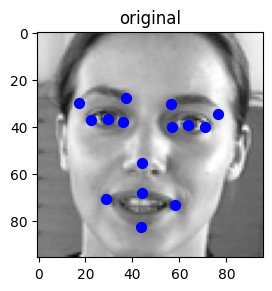

In [125]:
# idx = np.random.randint(0, facial_keypoints_train_datasets_flip_h.cardinality().numpy())
idx = 20

for image, keypoint in facial_keypoints_train_datasets_flip_h.skip(idx).take(1):
  plt.subplot(1, 2, 1)
  plt.imshow(image, cmap='gray')
  plt.title('original')
  # Loop through pairs of labels (x, y)
  for i in range(0, len(keypoint), 2):
    x = keypoint[i].numpy()
    y = keypoint[i+1].numpy()
    plt.scatter(x, y, s=200, marker='.', c='blue')


In [66]:
train_data_copy['Image']=train_data_copy['Image'].apply(lambda x: np.fromstring(x, sep=' ').astype(np.uint8))
train_data_copy['Image']=train_data_copy['Image'].str.split(pat=' ')

In [67]:
train_data_copy['Image'][:2]

0    [238, 236, 237, 238, 240, 240, 239, 241, 241, ...
1    [219, 215, 204, 196, 204, 211, 212, 200, 180, ...
Name: Image, dtype: object

In [12]:
train_data_copy['Image'].shape

(2140,)

In [13]:
train_data_copy['Image'][0].dtype

dtype('uint8')

In [14]:
print(f"image size: {len(train_data_copy['Image'][0])}")

image size: 9216


In [15]:
print(f"image size: {np.sqrt(len(train_data_copy['Image'][0]))}")

image size: 96.0


In [16]:
train_data_copy['Image'][:1]

0    [238, 236, 237, 238, 240, 240, 239, 241, 241, ...
Name: Image, dtype: object

In [17]:
train_data_copy['Image']=train_data_copy['Image'].apply(lambda x: x.reshape(96, 96, 1))

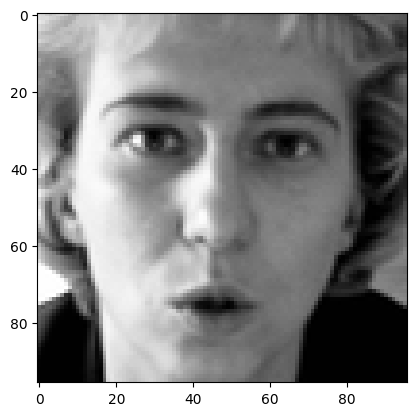

In [18]:
plt.imshow(train_data_copy['Image'][1], cmap='gray')
plt.show()

In [19]:
test_data_copy = test_data.copy(deep=True)

In [20]:
test_data_copy['Image']=test_data_copy['Image'].apply(lambda x: np.fromstring(x, sep=' ').astype(np.uint8))

In [21]:
test_data_copy['Image'][0].dtype

dtype('uint8')

In [22]:
print(f"image size: {len(test_data_copy['Image'][0])}")

image size: 9216


In [23]:
print(f"image size: {np.sqrt(len(test_data_copy['Image'][0]))}")

image size: 96.0


In [24]:
test_data_copy['Image']=test_data_copy['Image'].apply(lambda x: x.reshape(96, 96, 1))

In [25]:
test_data_copy[:1]

,ImageId,Image
0,1,"[[[182], [183], [182], [182], [180], [180], [1..."


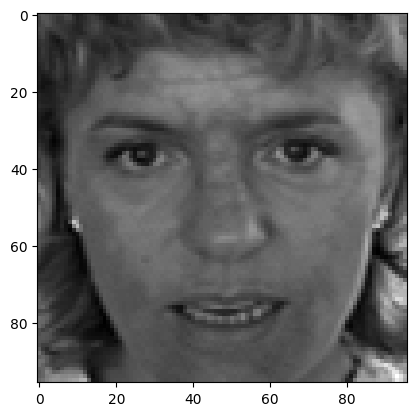

In [26]:
plt.imshow(test_data_copy['Image'][1], cmap='gray')
plt.show()

In [28]:
import re

# Fungsi untuk flip koordinat
def flip_coordinate(image_size, coord, flip_type='horizontal'):
    if flip_type == 'horizontal':
        return image_size - 1 - coord
    elif flip_type == 'vertical':
        return image_size - 1 - coord
    else:
        raise ValueError("flip_type harus 'horizontal', atau 'vertical'")

# Fungsi untuk menerapkan flip pada DataFrame
def apply_flip(df, image_size, flip_type):
    if flip_type == 'horizontal':
        columns = [col for col in samples_train_flip_horizontal.columns if re.search(r'x$', col, flags=re.I)]
    elif flip_type == 'vertical':
        columns = [col for col in samples_train_flip_horizontal.columns if re.search(r'y$', col, flags=re.I)]
    else:
        raise ValueError("flip_type hanya ada 'horizontal' dan 'vertical'")
    
    for col in columns:
        if (re.search(r'x$', col, flags=re.I)) and (flip_type == 'horizontal'):
            df[col] = df[col].map(lambda x: flip_coordinate(image_size, x, flip_type='horizontal'))
        if (re.search(r'y$', col, flags=re.I)) and (flip_type == 'vertical'):
            df[col] = df[col].map(lambda y: flip_coordinate(image_size, y, flip_type='vertical'))
    return df

samples_train = train_data_copy.copy(deep=True)
samples_train_flip_horizontal = samples_train.copy(deep=True)

# Menerapkan flip horizontal pada x_columns
samples_train_flip_horizontal = apply_flip(
    samples_train_flip_horizontal, 
    image_size=96, 
    flip_type='horizontal'
)

In [29]:
samples_train[:1]

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,"[[[238], [236], [237], [238], [240], [240], [2..."


In [30]:
samples_train_flip_horizontal[:1]

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,28.966436,39.002274,64.772992,36.421678,35.417925,39.647423,21.869654,39.969997,58.643429,37.389402,...,57.066803,33.804692,79.970165,66.385504,77.388992,51.687398,72.935459,51.869293,84.485774,"[[[238], [236], [237], [238], [240], [240], [2..."


In [31]:
final_train_data = pd.concat(
    [
        samples_train, 
        samples_train_flip_horizontal, 
    ], 
    ignore_index=True
)

In [55]:
# final_train_data.fillna(0, inplace=True)

In [56]:
# transformed_train_data = final_train_data.T.reset_index().rename(columns={'index':'facial_key_points'})
# max_display = 9 # Batas jumlah NaN yang akan ditampilkan
# nan_columns = find_nan_columns(transformed_train_data, name_columns='facial_key_points', max_display=max_display)

In [32]:
final_train_data.shape

(4280, 31)

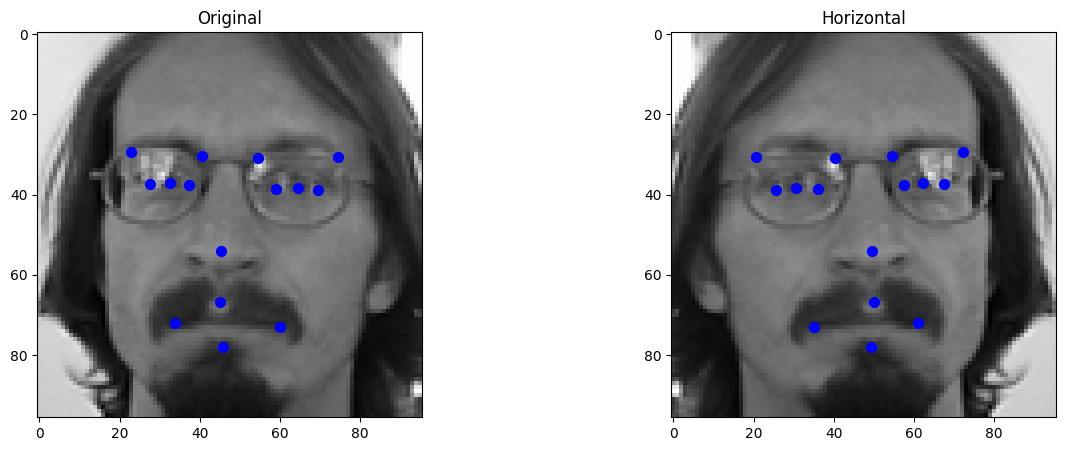

In [35]:
def get_keypoints(data, index):
    keypoints_columns = data.columns.drop('Image')
    return {
        key: (data.loc[index, key], data.loc[index, key.replace('x', 'y')])
        for key in keypoints_columns if 'x' in key
    }

def flip_image(image, flip_type):
    if flip_type == 'horizontal':
        return cv2.flip(image, 1)
    elif flip_type == 'vertical':
        return cv2.flip(image, 0)
    else:
        raise ValueError("flip_type harus 'horizontal', atau 'vertical'")

def main_plot(data, index, flip_types):
    plt.figure(figsize=(15, 5))
    
    for i, flip_type in enumerate(flip_types, start=1):
        idx = index + len(samples_train) * (i-1)
        img = data['Image'][idx].reshape(96, 96)
        if flip_type != 'original':
            img = flip_image(img, flip_type)
        keypoints = get_keypoints(data, idx)
        
        plt.subplot(1, len(flip_types), i)
        for key, (x, y) in keypoints.items():
            plt.scatter(x, y, s=200, marker='.', c='blue')
        plt.imshow(img, cmap='gray')
        plt.title(flip_type.capitalize())

    plt.show()

# Panggil fungsi utama untuk menampilkan plot
main_plot(final_train_data, index=90, flip_types=['original', 'horizontal'])

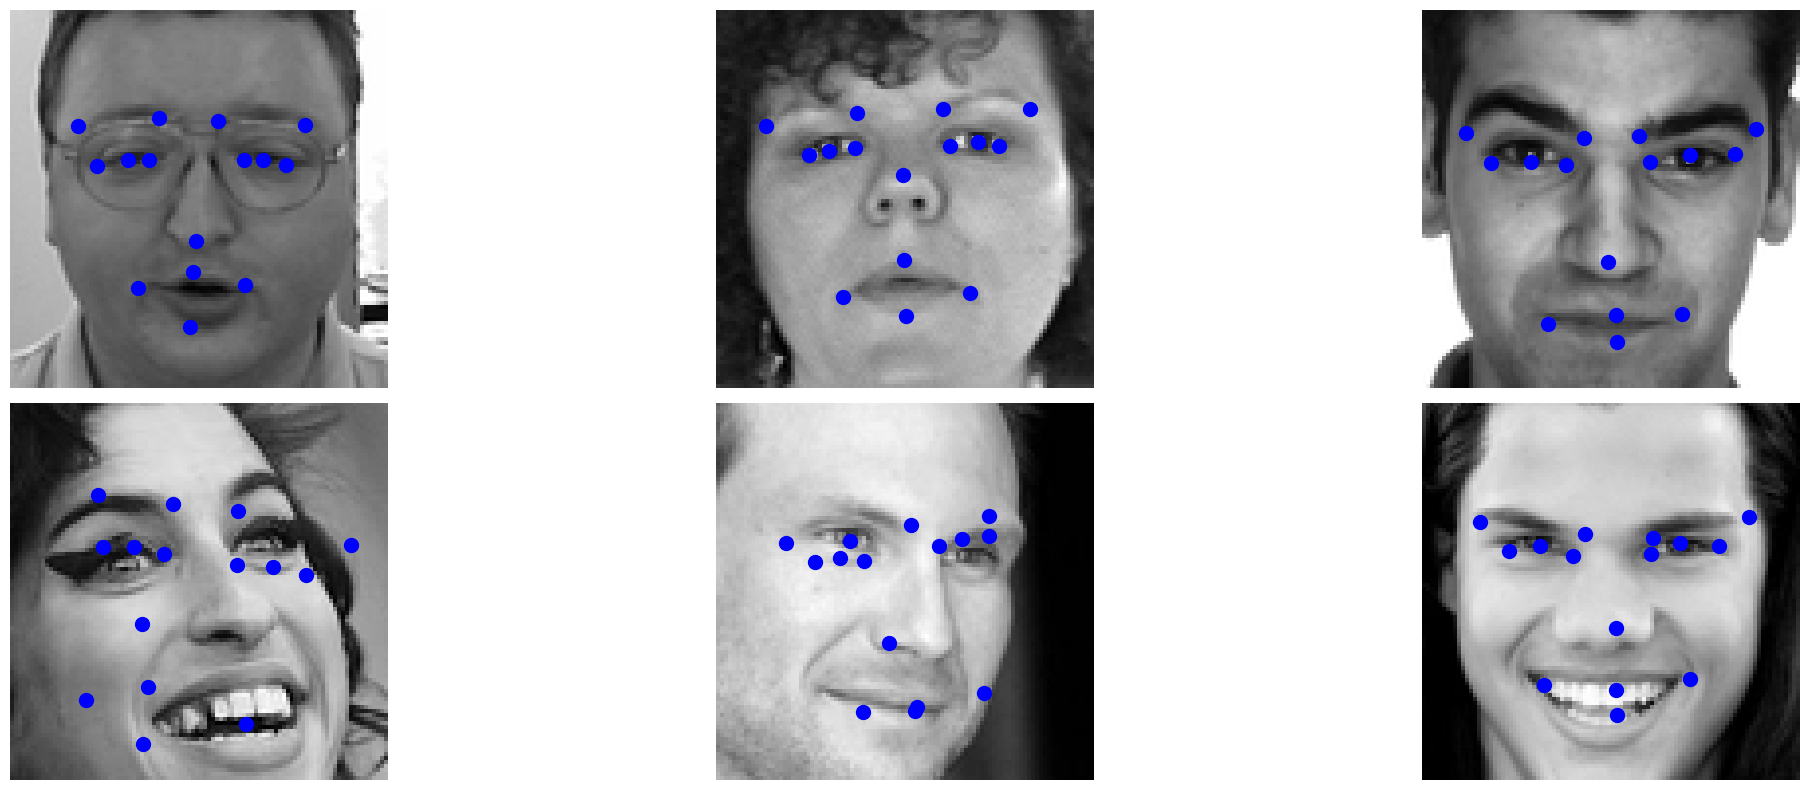

In [38]:
# Fungsi untuk menampilkan beberapa gambar dengan facial key points dalam satu figure
def show_multiple_images_with_keypoints_in_dataframe(
        dataframe, 
        keypoints_columns,
        image_column, 
        parent_path=None,
        num_images=5, 
        figsize_per_image=(8, 4), 
        image_size=(96, 96),
        scatter_size=400,
        scatter_color='blue'
    ):
    # Calculate the number of rows and columns needed
    num_columns = math.ceil(math.sqrt(num_images))
    num_rows = math.ceil(num_images / num_columns)
    figsize = (num_columns * figsize_per_image[0], num_rows * figsize_per_image[1])

    # Membuat plot
    plt.figure(figsize=figsize)
    
    # Memilih index secara acak untuk menampilkan gambar
    indices = np.random.choice(len(dataframe), num_images, replace=False)
    
    for i, index in enumerate(indices):
        # Mendapatkan data gambar dari kolom
        image_data = dataframe[image_column][index]
        img_exts = ['jpg', 'jpeg', 'png', 'tiff', 'bmp', 'gif', 'heif', 'raw', 'webp', 'svg', 'psd', 'ico', 'pdf']

        # Mengecek apakah data gambar adalah path ke file gambar atau string data gambar
        if isinstance(image_data, str) and any(image_data.endswith(ext) for ext in img_exts):
            # Jika path ke file gambar
            image = cv2.imread(parent_path + image_data, cv2.IMREAD_GRAYSCALE)
        elif isinstance(image_data, str):
            # Jika string data gambar
            image = np.fromstring(image_data, sep=' ').astype(np.float32)
            image = image.reshape(image_size[0], image_size[1])
        elif len(image_data.shape) == 1:
            # Jika data gambar berupa array angka
            image = np.array(image_data).astype(np.float32)
            image = image.reshape(image_size[0], image_size[1])
        else:
            image = np.array(image_data).astype(np.float32)
        
        # Menampilkan gambar pada subplot
        plt.subplot(num_rows, num_columns, i + 1)
        plt.imshow(image, cmap='gray')
        
        # Membuat dictionary key points
        keypoints = {
            key: (dataframe.loc[index, key], dataframe.loc[index, key.replace('x', 'y')])
            for key in keypoints_columns if 'x' in key
        }

        # Menambahkan titik key points pada gambar
        for key, (x, y) in keypoints.items():
            plt.scatter(x, y, s=scatter_size, marker='.', c=scatter_color)
        
        # Menghilangkan axis
        plt.axis('off')
    
    # Menampilkan figure
    plt.tight_layout()
    plt.show()

# Memuat dataset
keypoints_columns = final_train_data.columns[:-1]

# Menampilkan beberapa gambar beserta facial key points
show_multiple_images_with_keypoints_in_dataframe(
    final_train_data, 
    image_column='Image',
    # parent_path='./Assets/Images/',
    keypoints_columns=keypoints_columns, 
    num_images=6, 
    image_size=(96, 96)
)

In [39]:
print(
f'''
training samples: {final_train_data.shape}
dtype: {final_train_data['Image'][0].dtype}
shape: {final_train_data['Image'][0].shape}
''')


training samples: (4280, 31)
dtype: uint8
shape: (96, 96, 1)



In [40]:
images=np.stack(final_train_data['Image'].values)
facial_keypoints_images=final_train_data.drop(columns=['Image']).values

In [41]:
images.shape

(4280, 96, 96, 1)

In [42]:
facial_keypoints_images.shape

(4280, 30)

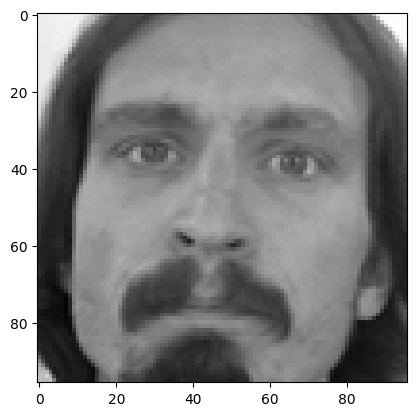

In [43]:
plt.imshow(images[0], cmap='gray')
plt.show()

In [44]:
face_images_tf_dataset = tf.data.Dataset.from_tensor_slices((images, facial_keypoints_images))

In [45]:
face_images_tf_dataset.cardinality()

<tf.Tensor: shape=(), dtype=int64, numpy=4280>

In [46]:
face_images_tf_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(96, 96, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(30,), dtype=tf.float64, name=None))>

In [103]:
images_test_dataset=np.stack(test_data_copy['Image'].values)
images_test_dataset.shape

(1783, 96, 96, 1)

In [82]:
images_test_dataset = tf.data.Dataset.from_tensor_slices(images_test_dataset)

In [83]:
images_test_dataset.cardinality()

<tf.Tensor: shape=(), dtype=int64, numpy=1783>

In [84]:
images_test_dataset.save("./Assets/datasets/facial_keypoints_test_dataset.tfrecord", compression="GZIP")

In [47]:
len_train_data = int(face_images_tf_dataset.cardinality().numpy() / 2)
len_train_data

2140

In [48]:
face_images_tf_dataset_orig = face_images_tf_dataset.take(len(train_data))
face_images_tf_dataset_before_flip = face_images_tf_dataset.skip(len(train_data))

In [49]:
print(face_images_tf_dataset_orig.cardinality())
print(face_images_tf_dataset_before_flip.cardinality())

tf.Tensor(2140, shape=(), dtype=int64)
tf.Tensor(2140, shape=(), dtype=int64)


In [50]:
# Define a function to flip the images and adjust keypoints
def flip_image_and_keypoints(image, keypoints):
    # Flip the image horizontally
    flipped_image = tf.image.flip_left_right(image)
    return flipped_image, keypoints

In [51]:
# Apply the flip function to the dataset
face_images_tf_dataset_fliped = face_images_tf_dataset_before_flip.map(flip_image_and_keypoints)

In [52]:
face_images_tf_dataset_fixed = face_images_tf_dataset_orig.concatenate(face_images_tf_dataset_fliped)

In [53]:
face_images_tf_dataset_fixed.cardinality()

<tf.Tensor: shape=(), dtype=int64, numpy=4280>

In [54]:
face_images_tf_dataset_fixed.save("./Assets/datasets/facial_keypoints_dataset_dropna.tfrecord", compression="GZIP")

In [55]:
face_images_tf_dataset_fixed_loaded = tf.data.Dataset.load("./Assets/datasets/facial_keypoints_dataset_dropna.tfrecord", compression="GZIP")

In [56]:
def processed_image(image, keypoint):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    keypoint = tf.cast(keypoint, tf.float32)
    return image, keypoint

face_images_tf_dataset_fixed_loaded = face_images_tf_dataset_fixed_loaded.map(processed_image)

In [57]:
face_images_tf_dataset_fixed_loaded.cardinality()

<tf.Tensor: shape=(), dtype=int64, numpy=4280>

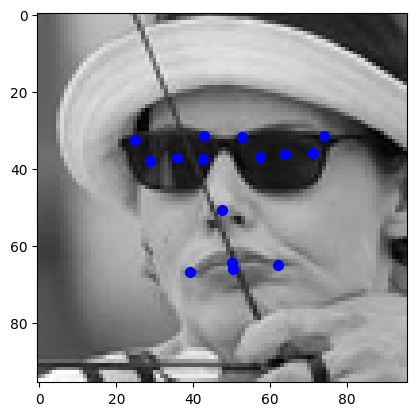

In [64]:
idx = np.random.randint(0, len_train_data)
idx_fliped = idx + len_train_data

for img, labels in face_images_tf_dataset_fixed_loaded.skip(idx_fliped).take(1):
    plt.imshow(img.numpy(), cmap='gray')

    # Loop through pairs of labels (x, y)
    for i in range(0, len(labels), 2):
        x = labels[i].numpy()
        y = labels[i+1].numpy()
        plt.scatter(x, y, s=200, marker='.', c='blue')

plt.show()

In [182]:
def compute_sobel(image, keypoints):
    # Convert the image to float32
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    
    # Expand dimensions to add the batch size
    image = tf.expand_dims(image, axis=0)
    
    # Menghitung gradien Sobel dalam arah x dan y
    sobel_edges = tf.image.sobel_edges(image)
    
    # Remove the batch dimension for further processing
    sobel_edges = tf.squeeze(sobel_edges, axis=0)
    
    # Reshape the sobel_edges tensor
    sobelX = sobel_edges[:, :, :, 0]
    sobelY = sobel_edges[:, :, :, 1]
    
    # Menghitung magnitudo Sobel
    sobelG = tf.sqrt(tf.square(sobelX) + tf.square(sobelY))
    
    return sobelG, keypoints

face_images_tf_dataset_fixed_loaded_sobel = face_images_tf_dataset_fixed_loaded.map(compute_sobel)

In [130]:
# canny = Canny(sigma=0.8, threshold_min=50, threshold_max=150, tracking_con=5, tracking_iterations=1)
# def compute_canny(image, keypoints):
#     # Convert the image to float32
#     image = tf.cast(image, tf.float32)
#     # Expand dimensions to add the batch size
#     image = tf.expand_dims(image, axis=0)
#     canny_edges = canny(image)

#     canny_edges = tf.squeeze(canny_edges, axis=0)
#     return canny_edges, keypoints

# face_images_tf_dataset_fixed_loaded_canny = face_images_tf_dataset_fixed_loaded.map(compute_canny)

In [183]:
face_images_tf_dataset_fixed_loaded_sobel

<_MapDataset element_spec=(TensorSpec(shape=(96, 96, 1), dtype=tf.float32, name=None), TensorSpec(shape=(30,), dtype=tf.float32, name=None))>

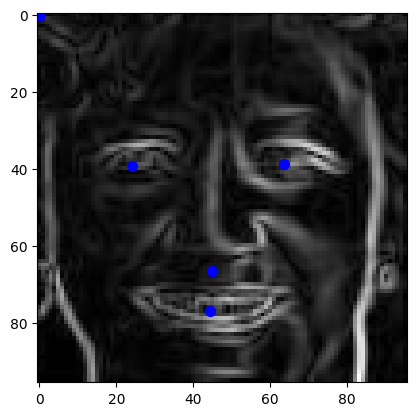

In [185]:
idx = np.random.randint(0, len(train_data))
idx_fliped = idx + len(train_data)

for img, labels in face_images_tf_dataset_fixed_loaded_sobel.skip(idx_fliped).take(1):
    plt.imshow(img.numpy(), cmap='gray')
    
    # Loop through pairs of labels (x, y)
    for i in range(0, len(labels), 2):
        x = labels[i].numpy()
        y = labels[i+1].numpy()
        plt.scatter(x, y, s=200, marker='.', c='blue')

    plt.show()

1. Buat code sebelum-sebelumnya menjadi lebih readable, atau dibuat clean code
2. proses untuk bagian gambar di dataframe menjadi flip secara horizontal, dengan method apply atau map

In [186]:
# def masked_mse_loss(y_true, y_pred):
#     mask = tf.not_equal(y_true, 0)
#     loss = tf.square(tf.boolean_mask(y_true - y_pred, mask))
#     return tf.reduce_mean(loss)

def masked_mse_loss(y_true, y_pred):
    # Create a mask based on the true labels
    mask = tf.where(tf.greater(y_true, 0), tf.ones_like(y_true), tf.zeros_like(y_true))
    # Compute the mean squared error
    mse = tf.square(y_true - y_pred)
    # Apply the mask to the mse
    masked_mse = mse * mask
    # Compute the mean of the masked mse
    return tf.reduce_mean(masked_mse)

def residual_block(x, filters, kernel_size=3, stride=1):
    shortcut = x
    x = tf.keras.layers.Conv2D(filters, kernel_size, strides=stride, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.Conv2D(filters, kernel_size, strides=1, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Add()([x, shortcut])
    x = tf.keras.layers.ReLU()(x)
    return x


def build_ml_resnet(input_shape):
    inputs = tf.keras.layers.Input(shape=input_shape)

    # Initial Conv Layer
    x = tf.keras.layers.Conv2D(32, (11, 11), strides=1, padding='same')(inputs)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)

    # Residual Blocks
    for _ in range(2):
        x = residual_block(x, 32)

    # Fully Connected Layer
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    outputs = tf.keras.layers.Dense(30)(x)  # 15 keypoints (x, y) coordinates

    model = tf.keras.models.Model(inputs, outputs)
    return model

model = build_ml_resnet((96, 96, 1))
model.compile(optimizer='adam', loss=masked_mse_loss, metrics=['mae'], run_eagerly=True)
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 96, 96, 1)]          0         []                            
                                                                                                  
 conv2d_30 (Conv2D)          (None, 96, 96, 32)           3904      ['input_7[0][0]']             
                                                                                                  
 batch_normalization_30 (Ba  (None, 96, 96, 32)           128       ['conv2d_30[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 re_lu_30 (ReLU)             (None, 96, 96, 32)           0         ['batch_normalization_30

In [187]:
data_train, data_test = tf.keras.utils.split_dataset(
    face_images_tf_dataset_fixed_loaded_sobel, 
    right_size=0.2, 
    shuffle=True, 
    seed=42
)

In [188]:
data_train.cardinality(), data_test.cardinality()

(<tf.Tensor: shape=(), dtype=int64, numpy=11278>,
 <tf.Tensor: shape=(), dtype=int64, numpy=2820>)

In [190]:
data_train_repeated = data_train.batch(64).repeat()
data_test_repeated = data_test.batch(64).repeat()

In [191]:
train_steps = 11278 // 64
valid_steps = 2820 // 64

# Assuming `train_images` and `train_keypoints` are your training data and labels
model.fit(
    data_train_repeated,
    steps_per_epoch=train_steps,
    validation_data=data_test_repeated, 
    validation_steps=valid_steps,
    epochs=5, 
)

Epoch 1/5
176/176 [==============================] - 215s 1s/step - loss: 652.2166 - mae: 30.3732 - val_loss: 247.5492 - val_mae: 24.1231
Epoch 2/5
176/176 [==============================] - 228s 1s/step - loss: 261.1637 - mae: 28.9620 - val_loss: 109.6081 - val_mae: 25.0927
Epoch 3/5
176/176 [==============================] - 227s 1s/step - loss: 245.1749 - mae: 28.6649 - val_loss: 82.3343 - val_mae: 25.9076
Epoch 4/5
176/176 [==============================] - 227s 1s/step - loss: 236.7566 - mae: 28.7163 - val_loss: 126.8526 - val_mae: 24.8545
Epoch 5/5
176/176 [==============================] - 226s 1s/step - loss: 239.1377 - mae: 28.5912 - val_loss: 107.6256 - val_mae: 25.0890


In [47]:
# import re

# # List of column names
# facial_key_points_columns=samples_test.drop(columns='Image').columns

# # Function to reverse the suffixes using regex
# def reverse_suffix(column_name):
#     return re.sub(r'(x|y)$', lambda match: 'y' if match.group(1).lower() == 'x' else 'x', column_name, flags=re.IGNORECASE | re.MULTILINE)

# # Apply the function to each column name
# facial_key_points_columns_reversed = [reverse_suffix(column) for column in facial_key_points_columns]

# # Print the result
# print(f'original: {facial_key_points_columns}')
# print(f'reversed: {facial_key_points_columns_reversed}')

# rename_columns = result = {key: value for key, value in zip(facial_key_points_columns, facial_key_points_columns_reversed)}
# samples_test_revesed.rename(columns=rename_columns, inplace=True)

#### langkah Uji Coba sebelum di ubah menjadi tensorflow datasets:
1. ambil 2 sampel untuk dijadikan percobaan, lalu buat copy dari 2 sampel tersebut gambar beserta facial-keypointnya.
2. setelah di copy maka akan ada 4 gambar dengan 2 gambar dan facial-keypoitnya yang sama.
3. 2 hasil gambar yang di copy lalu di flip secara horizontal untuk di augmentasi.
4. namun untuk facial key-pointya masih belum tercopy, sehingga koordinatnya masih salah.
5. maka perlu di atur dengan menukar sumbu x menjadi y dan y menjadi x.

#### langkah jika berhasil:
1. jika berhasil maka, terapkan untuk seluruh gambar dan facial keypointsnya, dengan kondisi facial keypoinnya suda terflip.
2. sehingga total data menjadi 2 kali lipat dari data asli, namun kondisi gambar pada data copy masih belum terflip.
3. setelah diubah menjadi tensorflow datasets maka gambar pada data copy di flip, dengan melakukan slicing index pada data copy. untuk diterapkannya flip horizontal.
4. jika gagal, maka cari cara lain.

#### validasi hasil preprocessing:
1. menampilkan gambar copy yang sudah terflip beserta facial keypointnya dengan data asli, untuk mengetahui langkah telah sukses.
